<a href="https://colab.research.google.com/github/v-demydchenko/Python-for-DA/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D1%83%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_%D0%BE%D1%80%D0%B5%D0%BD%D0%B4%D0%BD%D0%BE%D1%97_%D0%BF%D0%BB%D0%B0%D1%82%D0%B8_%D0%B7%D0%B0_%D0%B6%D0%B8%D1%82%D0%BB%D0%BE_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/House_Rent_Dataset.csv', sep=None, engine='python')

In [4]:
df.shape

(4746, 12)

In [5]:
df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [6]:
df.describe()


,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
df.dtypes

,0
Posted On,object
BHK,int64
Rent,int64
Size,int64
Floor,object
Area Type,object
Area Locality,object
City,object
Furnishing Status,object
Tenant Preferred,object


## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


In [8]:
# 1
miss = pd.DataFrame({
    "missing_count": df.isnull().sum(),
    "missing_percent": df.isnull().mean() * 100
}).sort_values("missing_percent", ascending=False)

print("1) Пропущені значення (кількість і %)", miss)

1) Пропущені значення (кількість і %)                    missing_count  missing_percent
Posted On                      0              0.0
BHK                            0              0.0
Rent                           0              0.0
Size                           0              0.0
Floor                          0              0.0
Area Type                      0              0.0
Area Locality                  0              0.0
City                           0              0.0
Furnishing Status              0              0.0
Tenant Preferred               0              0.0
Bathroom                       0              0.0
Point of Contact               0              0.0


In [9]:
# 2
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_stats = df[numeric_cols].describe().T

numeric_stats["Q1"] = df[numeric_cols].quantile(0.25)
numeric_stats["Q3"] = df[numeric_cols].quantile(0.75)
numeric_stats = numeric_stats[["count","mean","std","min","Q1","50%","Q3","max"]].rename(columns={"50%":"median"})

print(numeric_stats)

           count          mean           std     min       Q1   median  \
BHK       4746.0      2.083860      0.832256     1.0      2.0      2.0   
Rent      4746.0  34993.451327  78106.412937  1200.0  10000.0  16000.0   
Size      4746.0    967.490729    634.202328    10.0    550.0    850.0   
Bathroom  4746.0      1.965866      0.884532     1.0      1.0      2.0   

               Q3        max  
BHK           3.0        6.0  
Rent      33000.0  3500000.0  
Size       1200.0     8000.0  
Bathroom      2.0       10.0  


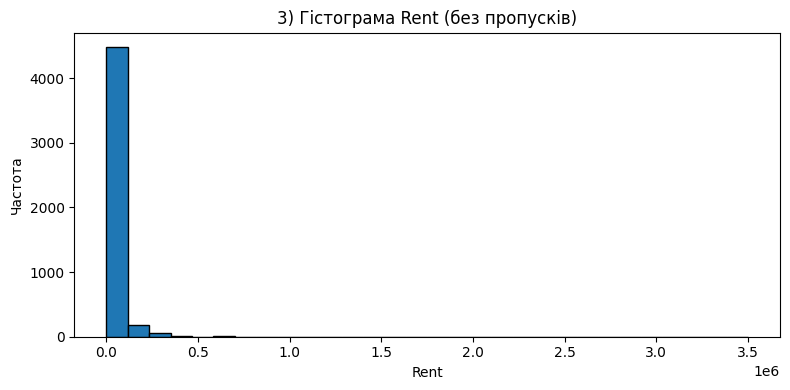

In [10]:
# 3
plt.figure(figsize=(8,4))
plt.hist(df["Rent"].dropna(), bins=30, edgecolor="k")
plt.title("3) Гістограма Rent (без пропусків)")
plt.xlabel("Rent")
plt.ylabel("Частота")
plt.grid(False)
plt.tight_layout()
plt.show()


 IQR: Q1=10000.00, Q3=33000.00, IQR=23000.00
   Нижня межа: -24500.00, Верхня межа: 67500.00
   Кількість пропущених у Rent: 0
   Знайдено викидів у Rent: 520 (загалом 4746 рядків)


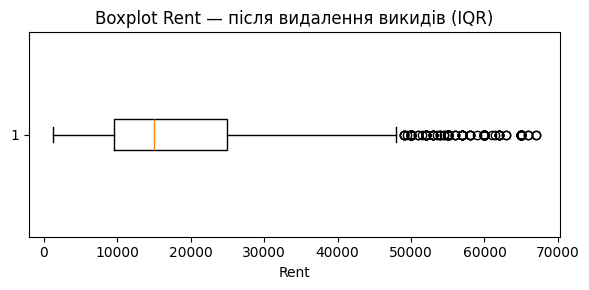

In [17]:
# 4
rent = df["Rent"]
q1 = rent.quantile(0.25)
q3 = rent.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_mask = (rent < lower_bound) | (rent > upper_bound)
outliers = df[outliers_mask]

print(f"\n IQR: Q1={q1:.2f}, Q3={q3:.2f}, IQR={iqr:.2f}")

print(f"   Нижня межа: {lower_bound:.2f}, Верхня межа: {upper_bound:.2f}")
print(f"   Кількість пропущених у Rent: {rent.isnull().sum()}")
print(f"   Знайдено викидів у Rent: {outliers.shape[0]} (загалом {df.shape[0]} рядків)")

# if outliers.shape[0] > 0:
#     print(outliers.head(20), "- Приклади викидів у Rent (перші 20)")
# else:
#     print("Викидів не знайдено за IQR-правилом.")

df_no_out = df[~outliers_mask].copy()


plt.figure(figsize=(6,3))
plt.boxplot(df_no_out["Rent"].dropna(), vert=False)
plt.title("Boxplot Rent — після видалення викидів (IQR)")
plt.xlabel("Rent")
plt.tight_layout()
plt.show()

In [12]:
# 5
categorical_cols = ["BHK","Floor","Area Type","Area Locality","City","Furnishing Status","Tenant Preferred","Point of Contact"]

cat_summary = []
for col in categorical_cols:
    nunique = int(df[col].nunique(dropna=True))
    top = df[col].value_counts(dropna=True).head(10)
    top_df = top.reset_index().rename(columns={"index": col, col: "count"})
    cat_summary.append({"column": col, "n_unique": nunique, "n_non_null": int(df[col].notnull().sum())})

cat_summary_df = pd.DataFrame(cat_summary).set_index("column")
print(cat_summary_df)

                   n_unique  n_non_null
column                                 
BHK                       6        4746
Floor                   480        4746
Area Type                 3        4746
Area Locality          2235        4746
City                      6        4746
Furnishing Status         3        4746
Tenant Preferred          3        4746
Point of Contact          3        4746



## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


Кореляційна матриця:
               BHK      Rent      Size  Bathroom
BHK       1.000000  0.369718  0.716145  0.794885
Rent      0.369718  1.000000  0.413551  0.441215
Size      0.716145  0.413551  1.000000  0.740703
Bathroom  0.794885  0.441215  0.740703  1.000000


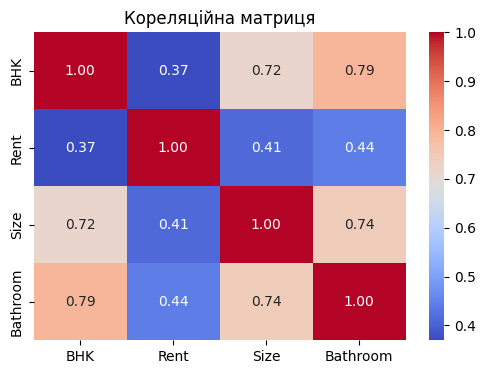

In [22]:
# 1.
corr = df[["BHK", "Rent", "Size", "Bathroom"]].corr()

print("Кореляційна матриця:")
print(corr)

# 2.
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()

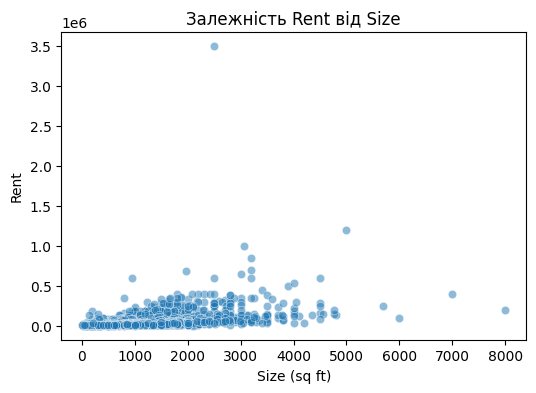

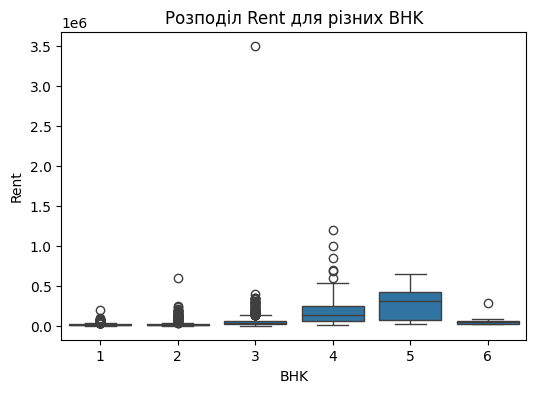

In [23]:
# 3.
plt.figure(figsize=(6,4))
sns.scatterplot(x="Size", y="Rent", data=df, alpha=0.5)
plt.title("Залежність Rent від Size")
plt.xlabel("Size (sq ft)")
plt.ylabel("Rent")
plt.show()

# 4.
plt.figure(figsize=(6,4))
sns.boxplot(x="BHK", y="Rent", data=df)
plt.title("Розподіл Rent для різних BHK")
plt.xlabel("BHK")
plt.ylabel("Rent")
plt.show()

## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Залишимо тільки ті категорії, що мають мало унікальних значень:
# Area Type, Furnishing Status, Tenant Preferred

df_encoded = pd.get_dummies(df, columns=["Area Type", "Furnishing Status", "Tenant Preferred"], drop_first=True)

# 2. Створення нових ознак (опціонально)
# Наприклад:
# - bathroom_per_bhk: співвідношення кількості ванн до кількості кімнат
# - size_per_bhk: середня площа на кімнату
df_encoded["bathroom_per_bhk"] = df_encoded["Bathroom"] / df_encoded["BHK"]
df_encoded["size_per_bhk"] = df_encoded["Size"] / df_encoded["BHK"]

# 3. Виключення колонок
# Виключимо "Area Locality", "City", "Point of Contact", бо там дуже багато унікальних значень
df_model = df_encoded.drop(columns=["Area Locality", "City", "Point of Contact", "Floor"])

# 4. Поділ на X та Y
X = df_model.drop(columns=["Rent"])
y = df_model["Rent"]

# 5. Стандартизація числових ознак
# Виберемо лише числові колонки для стандартизації
numeric_features = ["BHK", "Size", "Bathroom", "bathroom_per_bhk", "size_per_bhk"]

scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

print("Форма X:", X.shape)
print("Форма y:", y.shape)
X.head()

Форма X: (4746, 12)
Форма y: (4746,)


,Posted On,BHK,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,bathroom_per_bhk,size_per_bhk
0,2022-05-18,-0.100773,0.208960,0.038594,False,True,False,True,True,False,0.094346,0.432689
1,2022-05-13,-0.100773,-0.264125,-1.092067,False,True,True,False,True,False,-1.548828,-0.276283
2,2022-05-16,-0.100773,0.051265,-1.092067,False,True,True,False,True,False,-1.548828,0.196365
3,2022-07-04,-0.100773,-0.264125,-1.092067,False,True,False,True,True,False,-1.548828,-0.276283
4,2022-05-09,-0.100773,-0.185277,-1.092067,True,False,False,True,False,False,-1.548828,-0.158121


## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)